In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size = 100) #-3到3之间随机取100个值
X = x.reshape(-1, 1)
y = 0.5 * x + 3  +np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
#用多项式模型来训练
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degress):
    return Pipeline([
        ("PolynomialFeatures", PolynomialFeatures(degree= degress)),
        ("StandardScaler", StandardScaler()),
        ("LinearRegression", LinearRegression())
    ])

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.metrics import mean_squared_error

plot_reg = PolynomialRegression(degress=20)
plot_reg.fit(X_train, y_train)
y_plot_predict = plot_reg.predict(X_test)
mean_squared_error(y_test, y_plot_predict) #均方误差太大，很明显过拟合

167.9401086273922

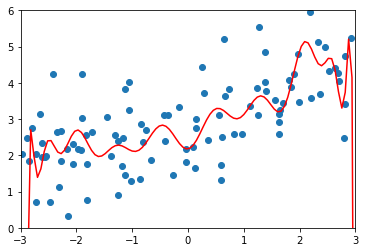

In [5]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = plot_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [6]:
#封装绘图函数
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

#### 使用岭回归

In [7]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("PolynomialFeatures", PolynomialFeatures(degree= degree)),
        ("StandardScaler", StandardScaler()),
        ("RidgeRegression", Ridge(alpha=alpha))
    ])

In [8]:
ridge1_reg = RidgeRegression(degree=20, alpha=0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict) #均方差减小很多，岭回归效果明显

1.3233492754096856

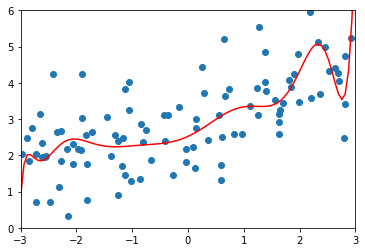

In [9]:
plot_model(ridge1_reg)

In [11]:
ridge2_reg = RidgeRegression(degree=20, alpha=1)
ridge2_reg.fit(X_train, y_train)
y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict) #均方差继续减小

1.1888759304218446

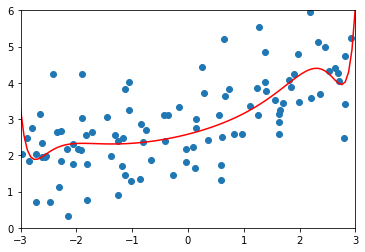

In [12]:
plot_model(ridge2_reg)

In [13]:
ridge3_reg = RidgeRegression(degree=20, alpha=100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict) #均方差回升，正则化有点过

1.3196456113086197

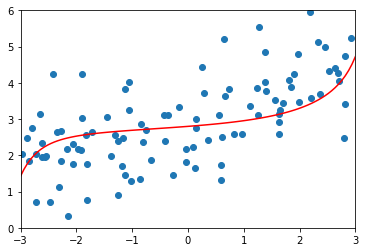

In [15]:
plot_model(ridge3_reg)

In [16]:
ridge4_reg = RidgeRegression(degree=20, alpha=1000000)
ridge4_reg.fit(X_train, y_train)
y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict) #均方差回升，正则化过头了

1.8404103153255003

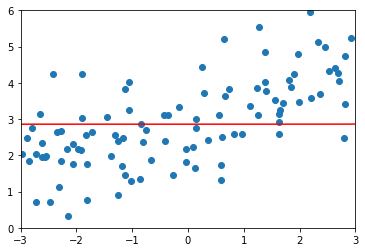

In [17]:
plot_model(ridge4_reg)